In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/daily-historical-stock-prices-1970-2018/historical_stocks.csv
/kaggle/input/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv


Startin

In [5]:
stock_prices = pd.read_csv('../input/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv')
stocks = pd.read_csv('../input/daily-historical-stock-prices-1970-2018/historical_stocks.csv')

In [7]:
stocks.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [17]:
stocks.shape

(6460, 5)

In [9]:
stocks.columns

Index(['ticker', 'exchange', 'name', 'sector', 'industry'], dtype='object')

In [98]:
stocks['name'].unique().size

5462

In [100]:
stocks['ticker'].unique().size

6460

In [42]:
stocks['exchange'].value_counts()

NASDAQ    3308
NYSE      3152
Name: exchange, dtype: int64

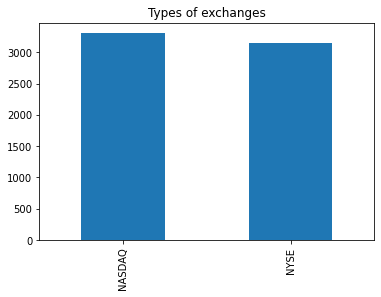

In [48]:
stocks['exchange'].value_counts().plot(kind='bar', title='Types of exchanges')

In [15]:
stocks['sector'].value_counts()

FINANCE                  1022
CONSUMER SERVICES         796
HEALTH CARE               784
TECHNOLOGY                607
CAPITAL GOODS             352
ENERGY                    286
PUBLIC UTILITIES          273
BASIC INDUSTRIES          272
CONSUMER NON-DURABLES     224
CONSUMER DURABLES         144
MISCELLANEOUS             139
TRANSPORTATION            120
SECTOR                      1
Name: sector, dtype: int64

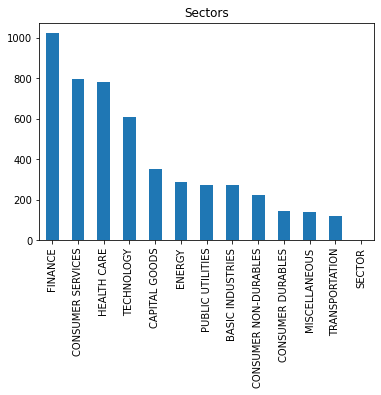

In [49]:
stocks['sector'].value_counts().plot(kind='bar', title='Sectors')

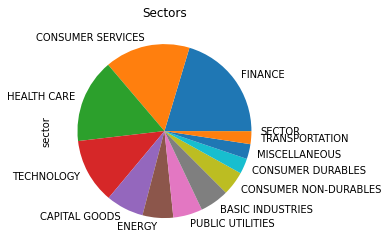

In [82]:
stocks['sector'].value_counts().plot(kind='pie', title='Sectors')

In [45]:
stocks['industry'].value_counts()

MAJOR PHARMACEUTICALS                              419
MAJOR BANKS                                        352
REAL ESTATE INVESTMENT TRUSTS                      234
BUSINESS SERVICES                                  223
OIL & GAS PRODUCTION                               159
                                                  ... 
PRECISION INSTRUMENTS                                1
GENERAL BLDG CONTRACTORS - NONRESIDENTIAL BLDGS      1
CONSUMER: GREETING CARDS                             1
ELECTRONICS DISTRIBUTION                             1
TOBACCO                                              1
Name: industry, Length: 136, dtype: int64

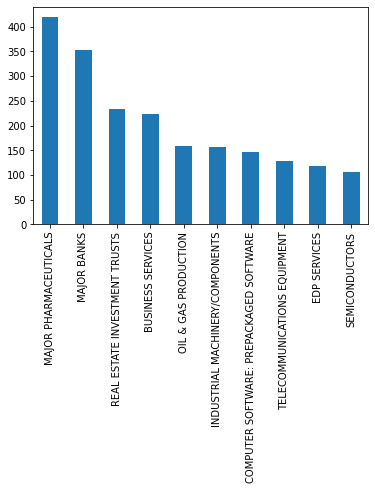

In [95]:
absolute_frequency_top10 = stocks['industry'].value_counts()[:10].copy()
absolute_frequency_top10 = absolute_frequency_top10.rename('')
absolute_frequency_top10.plot(kind='bar')

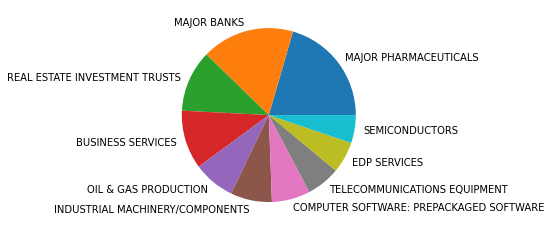

In [101]:
absolute_frequency_top10.plot(kind='pie')

In [102]:
####################################

In [142]:
stocks.groupby('name')['exchange'].apply(list)

name
1-800 FLOWERS.COM, INC.                           [NASDAQ]
1347 PROPERTY INSURANCE HOLDINGS, INC.    [NASDAQ, NASDAQ]
180 DEGREE CAPITAL CORP.                          [NASDAQ]
1ST CONSTITUTION BANCORP (NJ)                     [NASDAQ]
1ST SOURCE CORPORATION                            [NASDAQ]
                                                ...       
ZUMIEZ INC.                                       [NASDAQ]
ZUORA, INC.                                         [NYSE]
ZYMEWORKS INC.                                      [NYSE]
ZYNERBA PHARMACEUTICALS, INC.                     [NASDAQ]
ZYNGA INC.                                        [NASDAQ]
Name: exchange, Length: 5462, dtype: object

In [162]:
exchange_factor = stocks.groupby('name')['exchange'].apply(list)#.apply( lambda x: len(np.unique(x)))
exchange_factor

name
1-800 FLOWERS.COM, INC.                           [NASDAQ]
1347 PROPERTY INSURANCE HOLDINGS, INC.    [NASDAQ, NASDAQ]
180 DEGREE CAPITAL CORP.                          [NASDAQ]
1ST CONSTITUTION BANCORP (NJ)                     [NASDAQ]
1ST SOURCE CORPORATION                            [NASDAQ]
                                                ...       
ZUMIEZ INC.                                       [NASDAQ]
ZUORA, INC.                                         [NYSE]
ZYMEWORKS INC.                                      [NYSE]
ZYNERBA PHARMACEUTICALS, INC.                     [NASDAQ]
ZYNGA INC.                                        [NASDAQ]
Name: exchange, Length: 5462, dtype: object

In [163]:
ticker_factor = stocks.groupby('name')['ticker'].apply(list)#.apply( lambda x: len(np.unique(x))     )
ticker_factor

name
1-800 FLOWERS.COM, INC.                         [FLWS]
1347 PROPERTY INSURANCE HOLDINGS, INC.    [PIH, PIHPP]
180 DEGREE CAPITAL CORP.                        [TURN]
1ST CONSTITUTION BANCORP (NJ)                   [FCCY]
1ST SOURCE CORPORATION                          [SRCE]
                                              ...     
ZUMIEZ INC.                                     [ZUMZ]
ZUORA, INC.                                      [ZUO]
ZYMEWORKS INC.                                  [ZYME]
ZYNERBA PHARMACEUTICALS, INC.                   [ZYNE]
ZYNGA INC.                                      [ZNGA]
Name: ticker, Length: 5462, dtype: object

In [171]:
exchange_x_ticker = pd.concat([exchange_factor,ticker_factor],axis=1)
exchange_x_ticker

,exchange,ticker
name,,
"1-800 FLOWERS.COM, INC.",[NASDAQ],[FLWS]
"1347 PROPERTY INSURANCE HOLDINGS, INC.","[NASDAQ, NASDAQ]","[PIH, PIHPP]"
180 DEGREE CAPITAL CORP.,[NASDAQ],[TURN]
1ST CONSTITUTION BANCORP (NJ),[NASDAQ],[FCCY]
1ST SOURCE CORPORATION,[NASDAQ],[SRCE]
...,...,...
ZUMIEZ INC.,[NASDAQ],[ZUMZ]
"ZUORA, INC.",[NYSE],[ZUO]
ZYMEWORKS INC.,[NYSE],[ZYME]


In [172]:
#manter apenas linhas tal que len(exchange_x_ticker['exchange']) + len(exchange_x_ticker['ticker']) > 2

KeyError: False